In [1]:
import torch
import torch.nn as nn 
import torch.optim as optim
import matplotlib.pyplot as plt

In [2]:
# Combined dataset: bikes for short distances, cars for longer ones
distances = torch.tensor([
    [1.0], [1.5], [2.0], [2.5], [3.0], [3.5], [4.0], [4.5], [5.0], [5.5],
    [6.0], [6.5], [7.0], [7.5], [8.0], [8.5], [9.0], [9.5], [10.0], [10.5],
    [11.0], [11.5], [12.0], [12.5], [13.0], [13.5], [14.0], [14.5], [15.0], [15.5],
    [16.0], [16.5], [17.0], [17.5], [18.0], [18.5], [19.0], [19.5], [20.0]
], dtype=torch.float32)

# Corresponding delivery times in minutes
times = torch.tensor([
    [6.96], [9.67], [12.11], [14.56], [16.77], [21.7], [26.52], [32.47], [37.15], [42.35],
    [46.1], [52.98], [57.76], [61.29], [66.15], [67.63], [69.45], [71.57], [72.8], [73.88],
    [76.34], [76.38], [78.34], [80.07], [81.86], [84.45], [83.98], [86.55], [88.33], [86.83],
    [89.24], [88.11], [88.16], [91.77], [92.27], [92.13], [90.73], [90.39], [92.98]
], dtype=torch.float32)

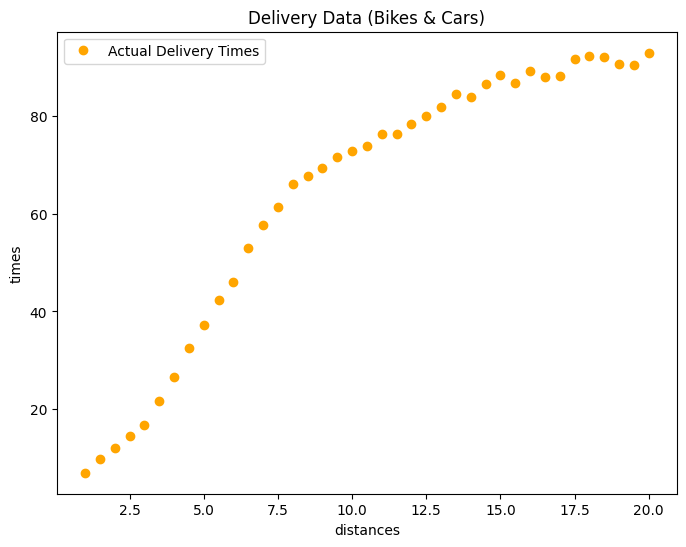

In [3]:
plt.figure(figsize=(8, 6))
plt.plot(distances.numpy(), times.numpy(), color='orange', marker='o', linestyle='none', label='Actual Delivery Times')
plt.title('Delivery Data (Bikes & Cars)')
plt.xlabel('distances')
plt.ylabel('times')
plt.legend()
plt.show()

In [4]:
distances_mean = distances.mean()
distances_std = distances.std()

times_mean = times.mean()
times_std = times.std()

distances_norm = (distances - distances_mean) / distances_std
times_norm = (times - times_mean) / times_std

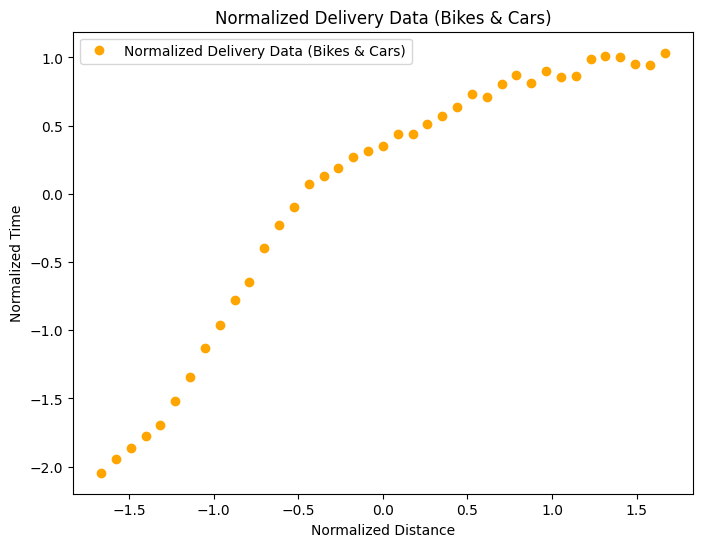

In [5]:
plt.figure(figsize=(8, 6))
plt.plot(distances_norm.numpy(), times_norm.numpy(), color='orange', marker='o', linestyle='none', label='Normalized Delivery Data (Bikes & Cars)')
plt.title('Normalized Delivery Data (Bikes & Cars)')
plt.xlabel('Normalized Distance')
plt.ylabel('Normalized Time')
plt.legend()
plt.show()

In [6]:
model = nn.Sequential(
    nn.Linear(1, 3),
    nn.ReLU(),
    nn.Linear(3, 1)
)
loss_function = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [7]:
for epoch in range(3000):
    optimizer.zero_grad()
    outputs = model(distances_norm)
    loss = loss_function(outputs, times_norm)
    loss.backward()
    optimizer.step()
    if (epoch + 1) % 50 == 0:
        print(f"Epoch {epoch + 1}: Loss = {loss.item()}")

Epoch 50: Loss = 0.6750863194465637
Epoch 100: Loss = 0.4763990044593811
Epoch 150: Loss = 0.3617474436759949
Epoch 200: Loss = 0.2921476662158966
Epoch 250: Loss = 0.24615490436553955
Epoch 300: Loss = 0.2132796049118042
Epoch 350: Loss = 0.18832141160964966
Epoch 400: Loss = 0.16893555223941803
Epoch 450: Loss = 0.15417636930942535
Epoch 500: Loss = 0.14195358753204346
Epoch 550: Loss = 0.1313522756099701
Epoch 600: Loss = 0.12299171835184097
Epoch 650: Loss = 0.1154344379901886
Epoch 700: Loss = 0.10833287984132767
Epoch 750: Loss = 0.10160383582115173
Epoch 800: Loss = 0.09557749330997467
Epoch 850: Loss = 0.09002059698104858
Epoch 900: Loss = 0.08473192155361176
Epoch 950: Loss = 0.07959018647670746
Epoch 1000: Loss = 0.07457605004310608
Epoch 1050: Loss = 0.06970757991075516
Epoch 1100: Loss = 0.0650092139840126
Epoch 1150: Loss = 0.060539133846759796
Epoch 1200: Loss = 0.05628808215260506
Epoch 1250: Loss = 0.052262213081121445
Epoch 1300: Loss = 0.048477306962013245
Epoch 1350:

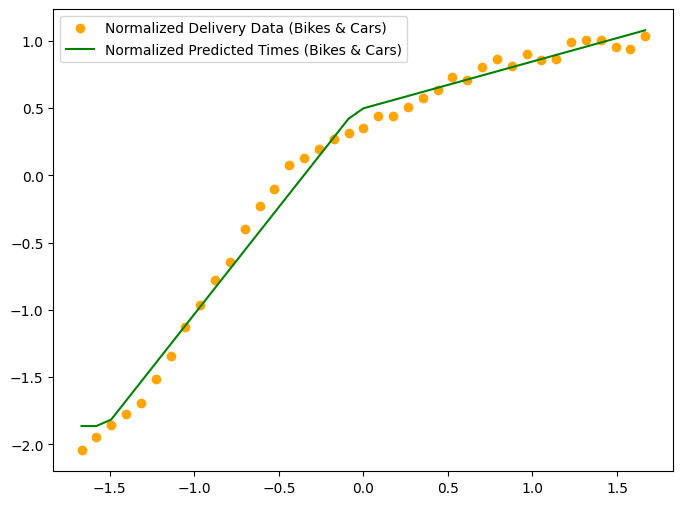

In [8]:
with torch.no_grad():
    predicted_times = model(distances_norm)
plt.figure(figsize=(8, 6))
plt.plot(distances_norm.numpy(), times_norm.numpy(), color='orange', marker='o', linestyle='none', label='Normalized Delivery Data (Bikes & Cars)')
plt.plot(distances_norm.numpy(), predicted_times.numpy(), color='green', marker='None', label='Normalized Predicted Times (Bikes & Cars)')
plt.legend()
plt.show()

In [9]:
distance_to_predict = 5.1

In [10]:
with torch.no_grad():
    distance_tensor = torch.tensor([[distance_to_predict]], dtype=torch.float32)
    new_distance_norm = (distance_tensor - distances_mean) / distances_std
    
    predicted_time_norm = model(new_distance_norm)
    
    predicted_time_actual = (predicted_time_norm * times_std) + times_mean

    print(f"Prediction for a {distance_to_predict}-mile delivery: {predicted_time_actual.item():.1f} minutes")
    

Prediction for a 5.1-mile delivery: 37.6 minutes
